In [1]:
# Import necessary libraries
from facebook_scraper import get_posts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Initialize dataframe to scrape Facebook post
post_df_full = pd.DataFrame(columns = [])


In [ ]:
# Start to collect Facebook post data by facebook_scraper library
for post in get_posts('ZeitimBild', cookies='cookies.txt', extra_info=True, pages=5000):
    post_entry = post
    fb_post_df = pd.DataFrame.from_dict(post_entry, orient='index')
    fb_post_df = fb_post_df.transpose()
    post_df_full = post_df_full.append(fb_post_df)
    print(post['post_id']+' get_Nr')

In [74]:
post_df_full.to_csv(r'fb_scrapped_data.csv', index = False)


In [2]:
# Reload dataframe from csv file
post_df_full_csv = pd.read_csv("fb_scrapped_data.csv")
post_df_full_csv['time'] = pd.to_datetime(post_df_full_csv['time'])


In [82]:
post_df_full_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 50 columns):
available                        2436 non-null bool
comments                         2436 non-null int64
comments_full                    18 non-null object
factcheck                        0 non-null float64
fetched_time                     2024 non-null object
image                            622 non-null object
image_id                         1773 non-null float64
image_ids                        2436 non-null object
image_lowquality                 2435 non-null object
images                           2432 non-null object
images_description               2432 non-null object
images_lowquality                2436 non-null object
images_lowquality_description    2436 non-null object
is_live                          2436 non-null bool
likes                            2199 non-null float64
link                             3 non-null object
links                            2436 no

In [3]:
#filter der fb post auf corona report posts
covid_df = post_df_full_csv[post_df_full_csv['text'].str.contains('Die neuesten Infos zum Coronavirus')]

In [ ]:
# Expand reactions columns into multiple columns
covid_df['reactions'] = covid_df['reactions'].apply(lambda x : dict(eval(x)) )
covid_df_reactions = covid_df['reactions'].apply(pd.Series )
# Merge expanded columns into dataframe
covid_df_with_reactions = pd.concat([covid_df, covid_df_reactions], axis=1).drop('reactions', axis=1)

In [ ]:
#eliminate punctuation in text (otherwise high numbers are not detected)
covid_df_with_reactions["text"] = covid_df_with_reactions["text"].apply(lambda x: x.replace(".", ""))
#search for case numbers in text
covid_df_with_reactions["cases"] = covid_df_with_reactions["text"].apply(lambda x:[int(s) for s in x.split() if s.isdigit()])
#keep 1. numbers of cases array
covid_df_with_reactions["cases2"] = covid_df_with_reactions["cases"].apply(lambda x: x[0])

In [91]:
str(covid_df_with_reactions['time'][1542])

'2021-05-15 11:58:00'

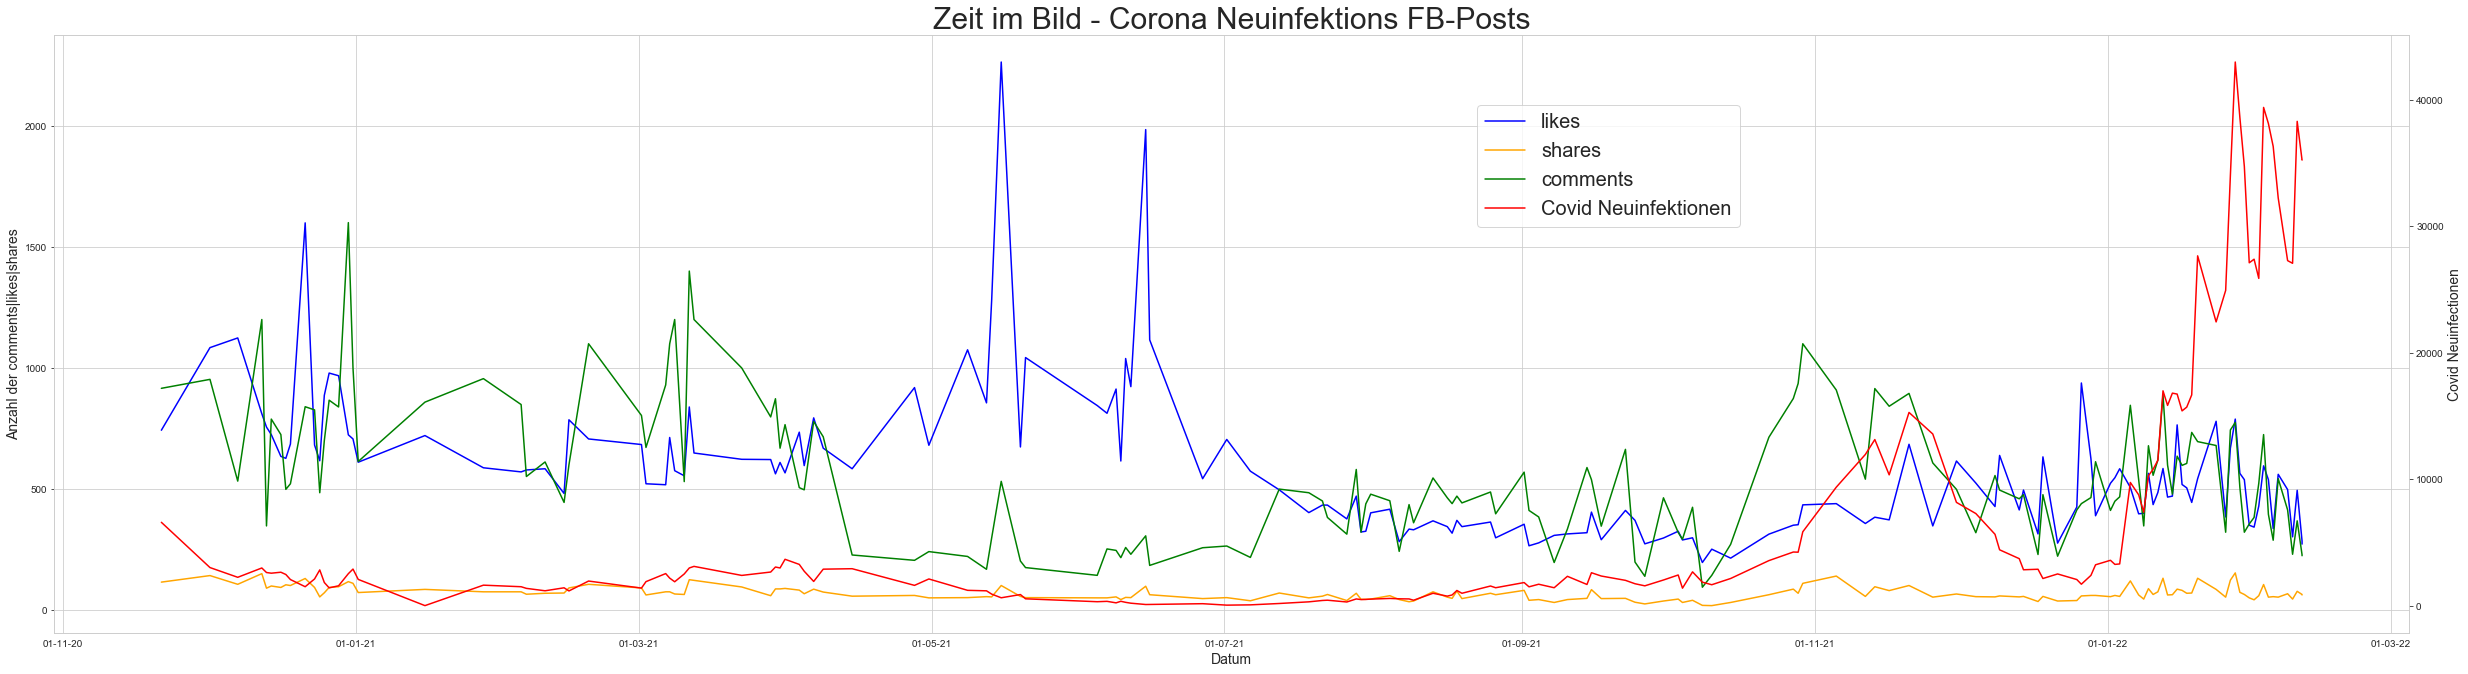

In [115]:
from matplotlib.dates import DateFormatter

a = Line2D([], [], color="blue", label="likes")
b = Line2D([], [], color="orange", label="shares")
c = Line2D([], [], color="green", label="comments")
d = Line2D([], [], color="red", label="Covid Neuinfektionen")

fig, ax = plt.subplots(figsize=(42.2, 11))
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['likes'], label = "Likes" , color="blue")
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['shares'], label = "Shares", color="orange" )
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['comments'], label = "Comments", color="green")
ax.set_ylabel("Anzahl der comments|likes|shares", fontsize=14)
ax.set_xlabel("Datum", fontsize=14)

#bbox_props = dict(boxstyle="rarrow", fc=(0.1, 0.1, 0.1), ec="b", lw=2)
#t = ax.text(162107988000000, 2000, "Direction", ha="center", va="center",
#            size=15,
#            bbox=bbox_props)
#ax.plot(t)
#bb = t.get_bbox_patch()
#bb.set_boxstyle("rarrow", pad=0.6)

plt.legend(handles=[a, b,c,d],loc = 2, fontsize=20, bbox_to_anchor = (0.6,0.90))
ax2 = plt.twinx()
ax2.plot(covid_df_with_reactions['time'], covid_df_with_reactions['cases2'], label = "cases", color="red")
ax2.set_ylabel("Covid Neuinfectionen", fontsize=14)
ax2.grid(None)
plt.title("Zeit im Bild - Corona Neuinfektions FB-Posts", fontsize=30)



ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y'))

fig.savefig("Zeit im Bild - Corona Neuinfektions FB-Posts.png",
            format='png',
            dpi=100,
            bbox_inches='tight')

In [96]:
covid_df_with_reactions['date'] = pd.to_numeric(pd.to_datetime(covid_df_with_reactions['time']))

In [104]:
covid_df_with_reactions['time'][1542]

Timestamp('2021-05-15 11:58:00')

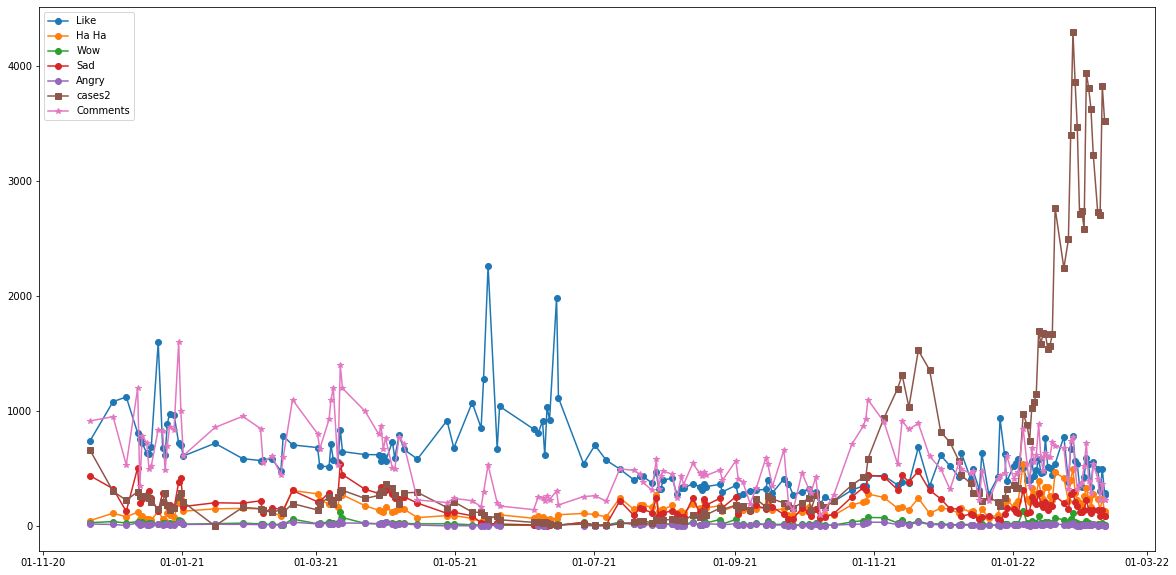

In [170]:
# Perform basic line plot to visualize post datetime vs Like, Love, Ha Ha, Wow, Sad, Angry,
# Care, shares and comments
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['like'], label = "Like", marker="o")
#ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['love'], label = "Love", marker="o")
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['angry'], label = "Angry", marker="o")
#ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['care'], label = "Care", marker="o")
#ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['cases3'], label = "cases2", marker="s")
ax.plot(covid_df_with_reactions['time'], covid_df_with_reactions['comments'], label = "Comments", marker="*")
plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y'))

In [136]:
covid_df_with_reactions[covid_df_with_reactions["likes"]>1900]

,available,comments,comments_full,factcheck,fetched_time,image,image_id,image_ids,image_lowquality,images,...,w3_fb_url,was_live,with,like,haha,wow,care,sad,angry,love
1398,True,307,NaN,NaN,2022-02-10 19:06:06.248889,NaN,1.015936e+16,['10159356078156878'],https://scontent-vie1-1.xx.fbcdn.net/v/t1.6435...,[],...,https://www.facebook.com/ZeitimBild/posts/1015...,False,NaN,1984.0,66.0,16.0,3.0,8.0,1.0,46.0
1542,True,532,NaN,NaN,2022-02-10 19:10:50.389586,NaN,1.015929e+16,['10159286765011878'],https://scontent-vie1-1.xx.fbcdn.net/v/t1.6435...,[],...,https://www.facebook.com/ZeitimBild/posts/1015...,False,NaN,2263.0,65.0,18.0,6.0,12.0,2.0,41.0
